In [45]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [8]:
train = pd.read_csv('train_sample.csv')
test = pd.read_csv('test_sample.csv')

In [16]:
X_train = train.drop(columns=["ID", "class"])
X_test = test.drop(columns="ID")
y_train = train["class"]
red = X_train.iloc[y_train[y_train == 1].index, :]
blue = X_train.iloc[y_train[y_train == 0].index, :]

<Axes: xlabel='x1', ylabel='x0'>

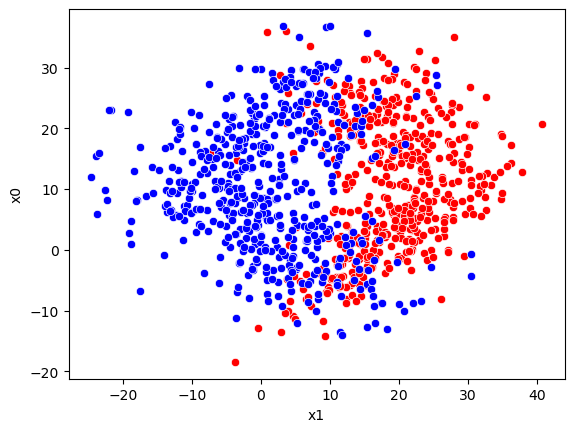

In [24]:
sns.scatterplot(x=red["x1"], y=red["x0"], color="red")
sns.scatterplot(x=blue["x1"], y=blue["x0"], color="blue")

<Axes: xlabel='x1', ylabel='x0'>

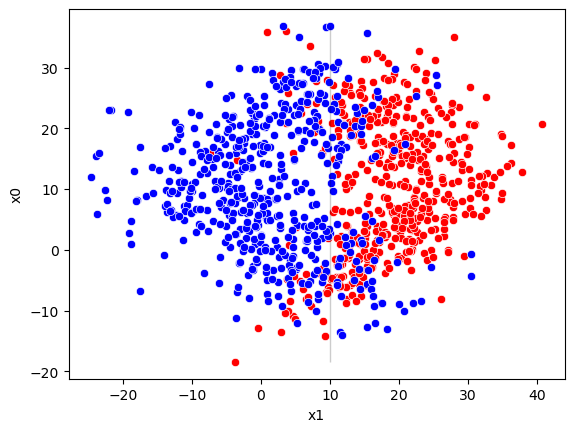

In [44]:
#сделаем прикол
sns.scatterplot(x=red["x1"], y=red["x0"], color="red")
sns.scatterplot(x=blue["x1"], y=blue["x0"], color="blue")
sns.lineplot(x=np.array([10, 10]), y = np.array([min(X_train["x0"]), max(X_train["x0"])]), color="#000000", linewidth=30)

In [82]:
svm = SVC()

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", svm)
])

grid = {
    'classifier__gamma': 0.1**np.arange(-1,4), 
    'classifier__C': 5*np.arange(1,6), 
    'classifier__kernel': ["linear", "poly", "rbf", "sigmoid"]  # Исправлено "rdf" на "rbf"
}
grid_search = GridSearchCV(pipeline, grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([ 5, 10, 15, 20, 25]),
                         'classifier__gamma': array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]),
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring='accuracy')

In [83]:
for mean,param in zip(grid_search.cv_results_['mean_test_score'],grid_search.cv_results_['params']):
    print("%f with: " % mean,param)

0.875000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(10.0), 'classifier__kernel': 'linear'}
0.854000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(10.0), 'classifier__kernel': 'poly'}
0.879000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(10.0), 'classifier__kernel': 'rbf'}
0.749000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(10.0), 'classifier__kernel': 'sigmoid'}
0.875000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(1.0), 'classifier__kernel': 'linear'}
0.852000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(1.0), 'classifier__kernel': 'poly'}
0.887000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(1.0), 'classifier__kernel': 'rbf'}
0.807000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(1.0), 'classifier__kernel': 'sigmoid'}
0.875000 with:  {'classifier__C': np.int64(5), 'classifier__gamma': 

In [84]:
print(grid_search.best_score_, grid_search.best_params_)

0.892 {'classifier__C': np.int64(15), 'classifier__gamma': np.float64(1.0), 'classifier__kernel': 'rbf'}


In [85]:
test_prediction = grid_search.predict(X_test)

In [86]:
test['class'] = test_prediction
test[['ID','class']].to_csv('submission.csv', index=False)